<a href="https://colab.research.google.com/github/abrange/mit-deeplearning/blob/main/MIT-DL-Mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIT Deep Learning

## Module 1 - Introduction - Linear Regression

This is an introduction to ML

In [1]:
dataset_x_y = [(1, 4),(-2, 3), (3, 6),(4.5, 8), (0, 2), (-4, -3),(-1, -2), (4, 7), (-1, 2.5)]

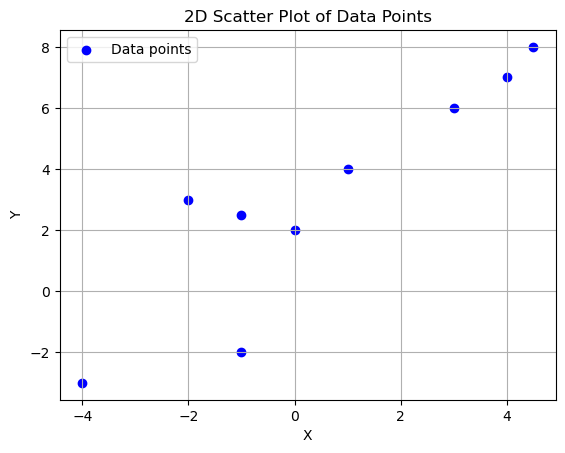

In [2]:
import matplotlib.pyplot as plt

x = [p[0] for p in dataset_x_y]
y = [p[1] for p in dataset_x_y]

# Create scatter plot
plt.scatter(x, y, color='blue', label='Data points')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scatter Plot of Data Points')

# Optional: add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [3]:
import numpy as np
x_mean = np.mean(x)
y_mean = np.mean(y)

## Analytical Solution (no iterative)

### Calculate Covariance
Covariance measures how two variables change together:

If x and y increase together, covariance is positive.
If one increases while the other decreases, covariance is negative.
If they don’t show any consistent joint behavior, covariance is near zero.


In [4]:
covariance = sum([(x - x_mean)*(y-y_mean) for x, y in dataset_x_y])

### Calculate Variance
Variance of x tells you how spread out your x values are:

- A small variance → x values are close together (narrow spread).
- A large variance → x values are spread widely apart.

In [5]:
variance = sum([(x - x_mean)**2 for x, _ in dataset_x_y ])

### Calculate Theta and Theta Zero
- Theta θ: It represents the slope of the line (also called m)
- Theta 0: It is the intercept (also called `b` and it presents where the line crosses the y-axes, or in other words, the y value when x = 0
- The function of the regression has the format `y = mx + b`

In [6]:
theta = covariance/variance

In [7]:
theta_zero = y_mean * theta - x_mean

In [8]:
theta_zero

np.float64(3.0995370370370368)

In [9]:
# Create line points for plotting the regression line
x_line = np.linspace(min(x), max(x), 100)
y_line = theta * x_line + theta_zero

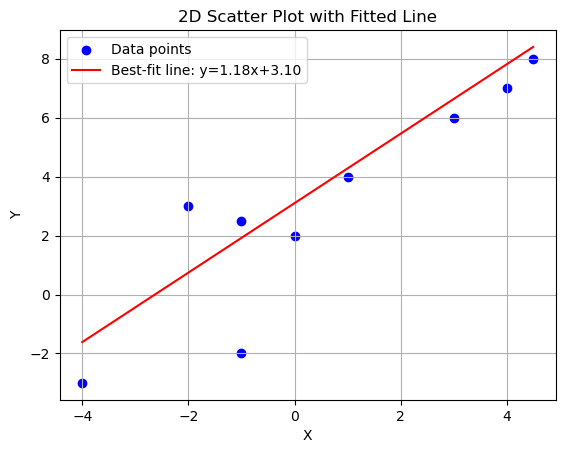

In [10]:
# Plot the regression line

# Create a scatter plot of data
plt.scatter(x, y, color='blue', label='Data points')

plt.plot(x_line, y_line, color='red', label=f'Best-fit line: y={theta:.2f}x+{theta_zero:.2f}')


# Labels, grid, legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scatter Plot with Fitted Line')
plt.grid(True)
plt.legend()

plt.show()

## Iterative Solution using Grandient Descent

In [27]:
# We must initialize parameters with a random numbers
theta = np.random.randn()
theta_zero = np.random.randn()

alpha = 0.01  # learning rate. This indicates how we change the thetas (parameters) on each iteration
iterations = 500

costs = []  # to track cost over iterations

In [28]:
# We must calculate the error, also known as residual, between the predicted/estimated value and the real value, for each pair x, y
# error = (predicted_y - real_y)
# and using the formula to get y, defined previously, we can calculate it based on the tested values of theta and theta_zero
# error = (predicted_y - real_y) = (x * theta + theta_zero) - y_real
def error(theta, theta_zero, real_y):
    return (x * theta + theta_zero) - y_real

In [29]:
# To better use data types, I will use now numpy Vector
X = np.array(x)
Y = np.array(y)
n = len(x)

In [30]:
print(theta)
for i in range(iterations):
    # I wont pase values, so they are modified globally
    y_pred = theta * X + theta_zero
    error = y_pred - y
    # I will calculate the gradient, by calculating the derivated 
    grad_theta = (1/n) * np.sum(error * X)
    grad_theta_zero = (1/n) * np.sum(error)
    # Finally, I adjust theta and theta_zero to a new value, which I hope should be a better choice
    
    theta -= alpha * grad_theta
    theta_zero -= alpha * grad_theta_zero
    
    cost = (1/(2*n)) * np.sum(error**2)
    costs.append(cost)

0.22445285745751778


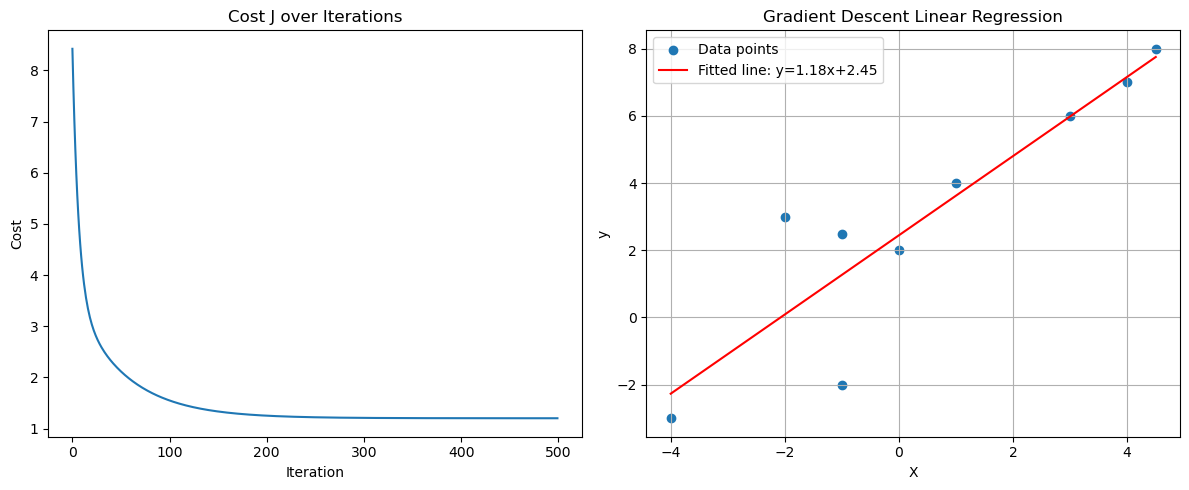

In [31]:
plt.figure(figsize=(12,5))

# Cost plot
plt.subplot(1,2,1)
plt.plot(costs)
plt.title("Cost J over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

# Regression result
plt.subplot(1,2,2)
plt.scatter(X, y, label="Data points")
x_line = np.linspace(min(X), max(X), 100)
y_line = theta * x_line + theta_zero
plt.plot(x_line, y_line, color='red', label=f"Fitted line: y={theta:.2f}x+{theta_zero:.2f}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Descent Linear Regression")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Result Module 1 assignment
- *Theta*: 1.18
- *Theta zero*: 2.45

there is a difference between the Analytical and Iterative ways to find the parameters that best fit the data

This image, is the image shared in the excercise which is similar to the line I got:
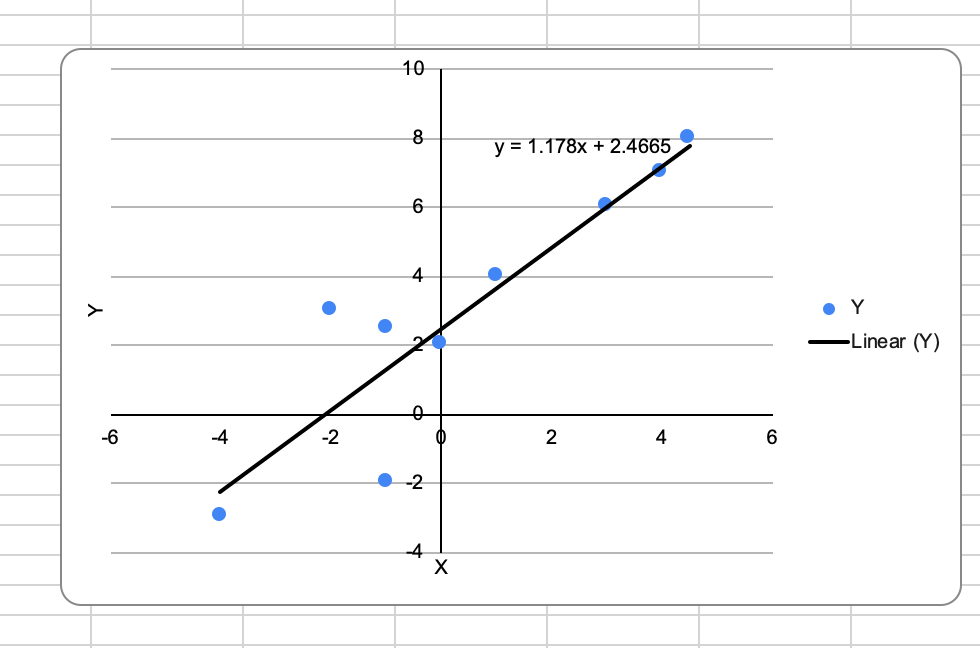